<a href="https://colab.research.google.com/github/anujsaxena/Python/blob/main/Transformer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformers**

The Transformer Neural Network is a novel architecture that aims to solve sequence-to-sequence tasks while handling long-range dependencies with ease. Sequence-to-Sequence (or Seq2Seq) is a neural net that transforms a given sequence of elements, such as the sequence of words in a sentence, into another sequence. 


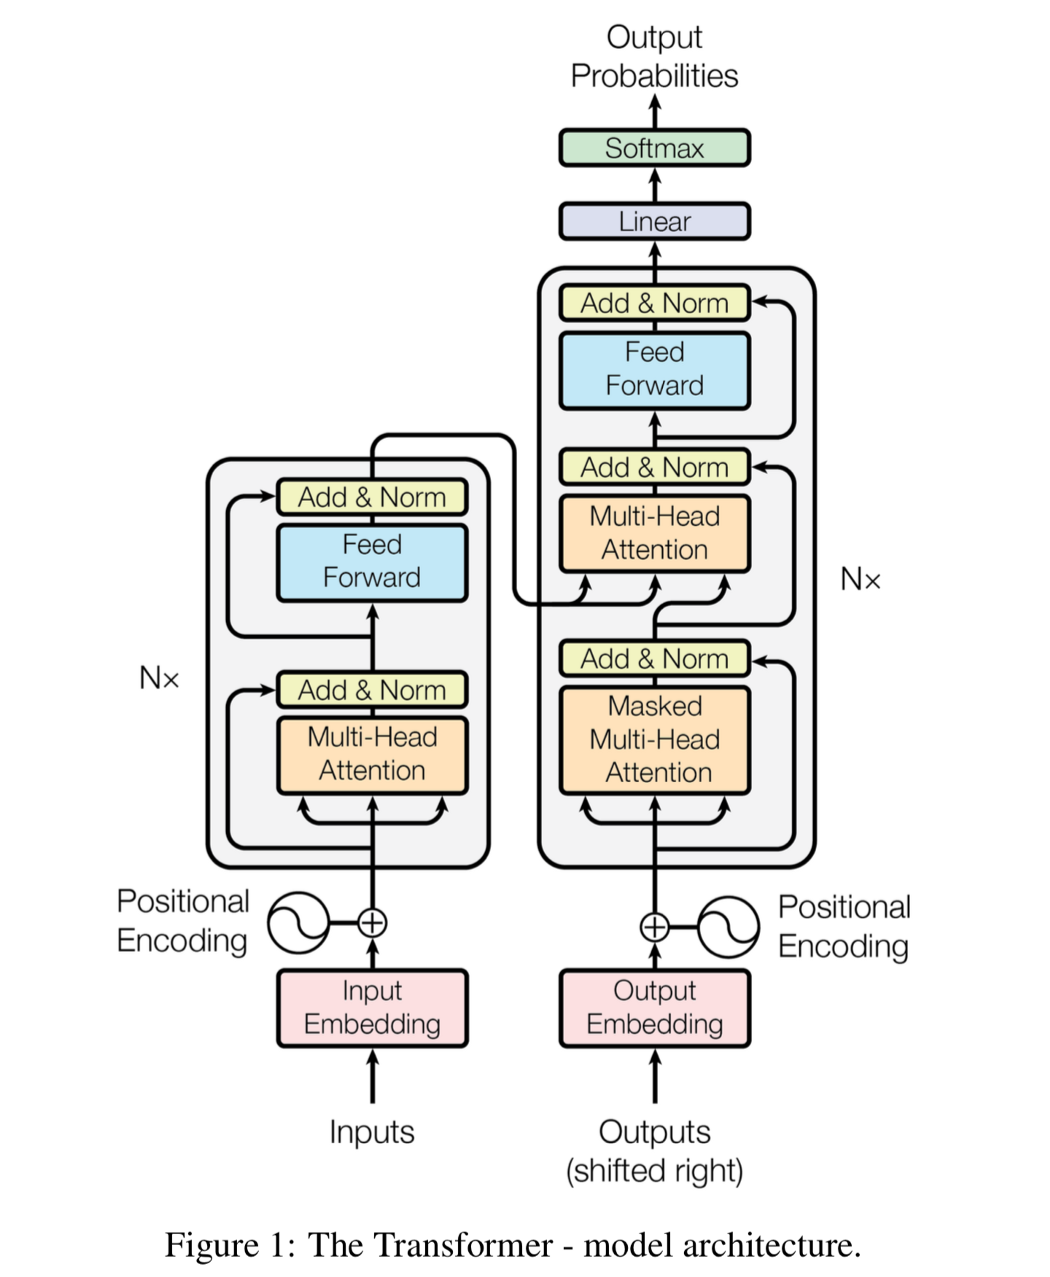



The Encoder is on the left and the Decoder is on the right. Both Encoder and Decoder are composed of modules that can be stacked on top of each other multiple times, which is described by Nx in the figure. We see that the modules consist mainly of Multi-Head Attention and Feed Forward layers. The inputs and outputs (target sentences) are first embedded into an n-dimensional space since we cannot use strings directly.

In [1]:
!pip install pytorch-transformers

     |████████████████████████████████| 176 kB 11.3 MB/s 
     |████████████████████████████████| 131 kB 43.0 MB/s 
     |████████████████████████████████| 895 kB 51.1 MB/s 
     |████████████████████████████████| 1.2 MB 48.5 MB/s 
     |████████████████████████████████| 8.5 MB 40.5 MB/s 
     |████████████████████████████████| 79 kB 8.5 MB/s 
     |████████████████████████████████| 138 kB 52.5 MB/s 
     |████████████████████████████████| 127 kB 48.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# **Missing word**

In [2]:
import torch
from pytorch_transformers import GPT2Tokenizer, GPT2LMHeadModel
# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')


100%|██████████| 456318/456318 [00:00<00:00, 1126154.31B/s]


GPT-2 is a transformers model pretrained on a very large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts. More precisely, it was trained to guess the next word in sentences.


More precisely, inputs are sequences of continuous text of a certain length and the targets are the same sequence, shifted one token (word or piece of word) to the right. The model uses internally a mask-mechanism to make sure the predictions for the token i only uses the inputs from 1 to i but not the future tokens.


This way, the model learns an inner representation of the English language that can then be used to extract features useful for downstream tasks. The model is best at what it was pretrained for however, which is generating texts from a prompt.

In [3]:
text = 'Which is the fastest bike in the'
indexed_tokens = tokenizer.encode(text)
# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])
# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

#evaluate the model
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
  outputs= model(tokens_tensor)
  predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
print('Original Text')
print(text)
print('Missing Text inserted')
print(predicted_text)

100%|██████████| 548118077/548118077 [00:18<00:00, 29098349.02B/s]


Original Text
Which is the fastest bike in the
Missing Text inserted
 Which is the fastest bike in the world


In [4]:
text ='In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.'

In [5]:
indexed_tokens = tokenizer.encode(text)
# Convert indexed tokens in a PyTorch tensor
tokens_tensor = torch.tensor([indexed_tokens])
# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

#evaluate the model
model.eval()

# If you have a GPU, put everything on cuda
tokens_tensor = tokens_tensor.to('cuda')
model.to('cuda')

# Predict all tokens
with torch.no_grad():
  outputs= model(tokens_tensor)
  predictions = outputs[0]

# Get the predicted next sub-word
predicted_index = torch.argmax(predictions[0, -1, :]).item()
predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
print('Original Text')
print(text)
print('Missing Text inserted')
print(predicted_text)

Original Text
In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.
Missing Text inserted
 In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.



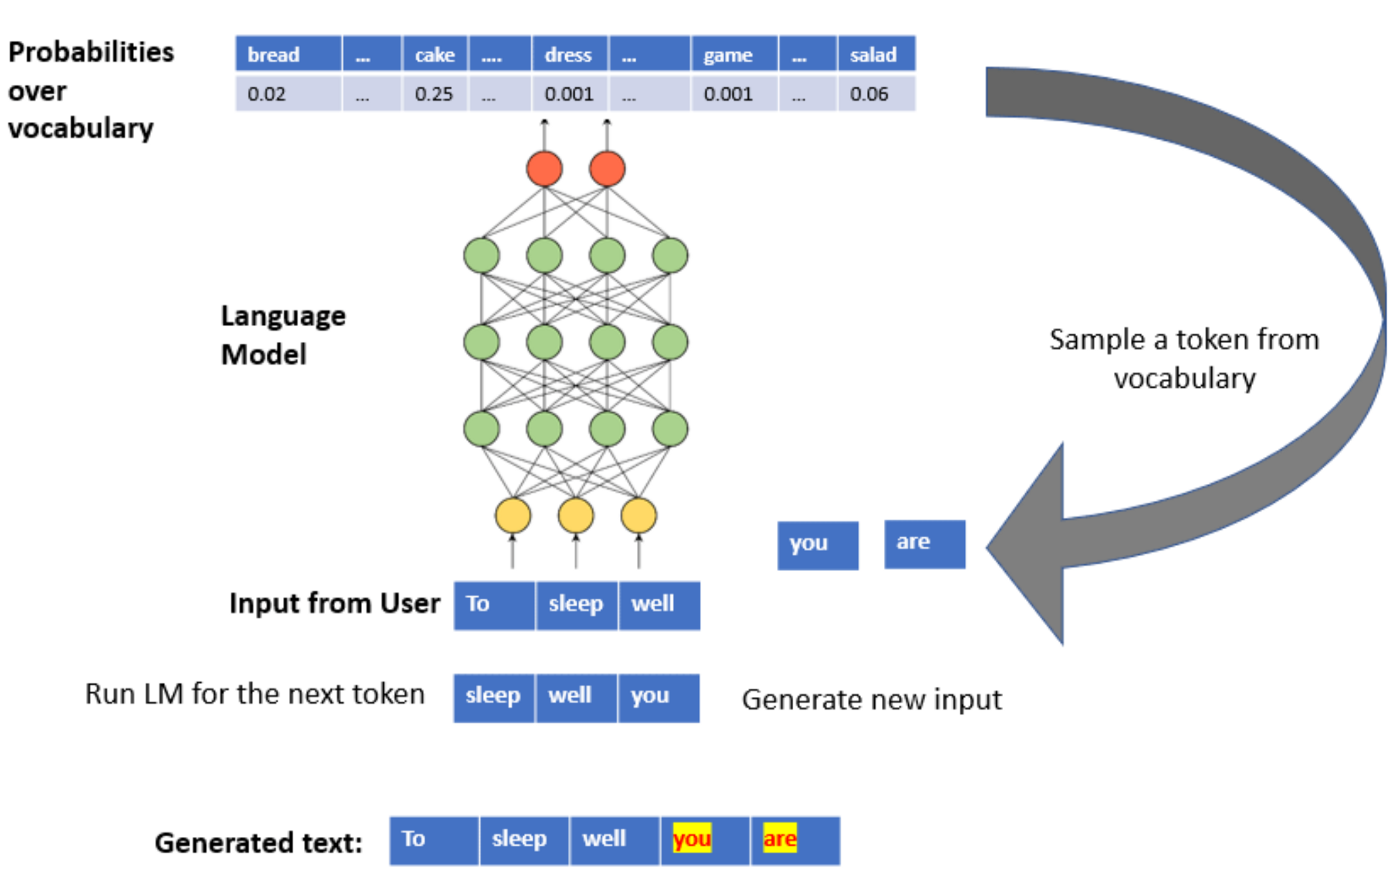

In [6]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 12.2 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 596 kB 45.8 MB/s 
     |████████████████████████████████| 3.3 MB 47.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
import os
import torch
from torch.nn import functional as F
import string
from transformers import BertTokenizer, BertForMaskedLM, XLNetTokenizer, XLNetModel, AutoModelWithLMHead, AutoTokenizer, top_k_top_p_filtering, logging
logging.set_verbosity_error()

In [8]:
#declare the variable

no_words_to_be_predicted = globals()
select_model = globals()
enter_input_text = globals()

#Create a function for initial model settings as input from the user
def set_model_config(**kwargs):
  for key, value in kwargs.items():
    print("{0} = {1}".format(key, value))
  
  no_words_to_be_predicted = list(kwargs.values())[0] # integer values
  select_model = list(kwargs.values())[1] # possible values = 'bert' or 'gpt' or 'xlnet'
  enter_input_text = list(kwargs.values())[2] #only string

  return no_words_to_be_predicted, select_model, enter_input_text

In [9]:
# bert encode
def encode_bert(tokenizer, text_sentence, add_special_tokens=True):
  text_sentence = text_sentence.replace('<mask>', tokenizer.mask_token)
  # if <mask> is the last token, append a "." so that models dont predict punctuation.
  if tokenizer.mask_token == text_sentence.split()[-1]:
    text_sentence += ' .'
    input_ids = torch.tensor([tokenizer.encode(text_sentence, add_special_tokens=add_special_tokens)])
    mask_idx = torch.where(input_ids == tokenizer.mask_token_id)[1].tolist()[0]
  return input_ids, mask_idx
  
# bert decode
def decode_bert(tokenizer, pred_idx, top_clean):
  ignore_tokens = string.punctuation + '[PAD]'
  tokens = []
  for w in pred_idx:
    token = ''.join(tokenizer.decode(w).split())
    if token not in ignore_tokens:
      tokens.append(token.replace('##', ''))
  return '\n'.join(tokens[:top_clean])

In [10]:
def get_all_predictions(text_sentence,top_clean=5):
      print(text_sentence)
      input_ids, mask_idx = encode_bert(bert_tokenizer, text_sentence)
      with torch.no_grad():
          predict = bert_model(input_ids)[0]
      bert = decode_bert(bert_tokenizer, predict[0, mask_idx, :].topk(3).indices.tolist(), top_clean)
      return bert

In [11]:
#wrapper function for encoder and decoder
def get_prediction_end_of_sentence(input_text, model_name):
  #try:
    if model_name.lower() == "bert":
      input_text += ' <mask>'
      print(input_text)
      res = get_all_predictions(input_text, top_clean=int(no_words_to_be_predicted)) 
      return res
    elif model_name.lower() == "gpt":
      print(input_text)
      res = get_all_predictions(input_text, top_clean=int(no_words_to_be_predicted)) 
      return res
    else:
      print(input_text)
      res = get_all_predictions(input_text, top_clean=int(no_words_to_be_predicted))
      return res

  #except Exception as error:
   # pass

In [12]:
def load_model(model_name):
  try:
    if model_name.lower() == "bert":
      bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
      bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased').eval()
      return bert_tokenizer,bert_model
    elif model_name.lower() == "gpt":
      gpt_tokenizer = AutoTokenizer.from_pretrained("gpt2")
      gpt_model = AutoModelWithLMHead.from_pretrained("gpt2")
      return gpt_tokenizer,gpt_model
    else:
      xlnet_tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")
      xlnet_model = AutoModelWithLMHead.from_pretrained("xlnet-base-cased")
      return xlnet_tokenizer, xlnet_model
  except Exception as e:
    pass

In [19]:
#Main
try:
  print("Next Word Prediction with Pytorch using BERT, GPT, and XLNet")
  no_words_to_be_predicted, select_model, enter_input_text = set_model_config(no_words_to_be_predicted=5, select_model = "bert", enter_input_text = "How is your")
  if select_model.lower() == "bert":
    bert_tokenizer, bert_model  = load_model(select_model)
    res = get_prediction_end_of_sentence(enter_input_text, select_model)
    #res = get_prediction_end_of_sentence("why are", "bert")
    print("result is: {}" .format(res))
    answer_bert = []
    print(res['bert'].split("\n"))
    for i in res['bert'].split("\n"):
      answer_bert.append(i)
      answer_as_string_bert = "    ".join(answer_bert)
      print("output answer is: {}" .format(answer_as_string_bert))
except Exception as e:
  print('end')


Next Word Prediction with Pytorch using BERT, GPT, and XLNet
no_words_to_be_predicted = 5
select_model = bert
enter_input_text = How is your
How is your <mask>
How is your <mask>
result is: mother
family
sister
end


In a nutshell, the task of the encoder, on the left half of the Transformer architecture, is to map an input sequence to a sequence of continuous representations, which is then fed into a decoder. 


The decoder, on the right half of the architecture, receives the output of the encoder together with the decoder output at the previous time step, to generate an output sequence.

The encoder consists of a stack of  N= 6 identical layers, where each layer is composed of two sublayers:

The first sublayer implements a multi-head self-attention mechanism. We had seen that the multi-head mechanism implements h heads that receive a (different) linearly projected version of the queries, keys and values each, to produce h outputs in parallel that are then used to generate a final result. 

The second sublayer is a fully connected feed-forward network, consisting of two linear transformations with Rectified Linear Unit (ReLU) activation in between:

"FFN"(x)="ReLU"(W_1 x+b_1)W_2+b_2

The six layers of the Transformer encoder apply the same linear transformations to all of the words in the input sequence, but each layer employs different weight (W1,W2) and bias (b1,b2) parameters to do so. 

Furthermore, each of these two sublayers has a residual connection around it.
Each sublayer is also succeeded by a normalization layer, layernorm(.), which normalizes the sum computed between the sublayer input, x, and the output generated by the sublayer itself, sublayer(x):

layernorm(x+sublayer(x))

An important consideration to keep in mind is that the Transformer architecture cannot inherently capture any information about the relative positions of the words in the sequence, since it does not make use of recurrence. This information has to be injected by introducing positional encodings to the input embeddings. 

The positional encoding vectors are of the same dimension as the input embeddings, and are generated using sine and cosine functions of different frequencies. Then, they are simply summed to the input embeddings in order to inject the positional information.




# **Decoder**

The decoder shares several similarities with the encoder. The decoder also consists of a stack of N = 6 identical layers that are, each, composed of three sublayers:

1.	The first sublayer receives the previous output of the decoder stack, augments it with positional information, and implements multi-head self-attention over it. While the encoder is designed to attend to all words in the input sequence, regardless of their position in the sequence, the decoder is modified to attend only to the preceding words. Hence, the prediction for a word at position, i, can only depend on the known outputs for the words that come before it in the sequence. In the multi-head attention mechanism (which implements multiple, single attention functions in parallel), this is achieved by introducing a mask over the values produced by the scaled multiplication of matrices Q and K. This masking is implemented by suppressing the matrix values that would, otherwise, correspond to illegal connections:


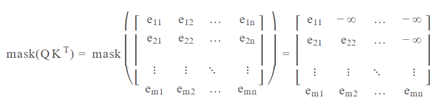


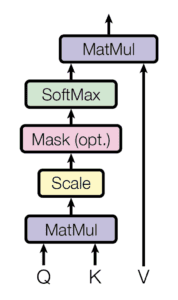


2.	The second layer implements a multi-head self-attention mechanism, which is similar to the one implemented in the first sublayer of the encoder. On the decoder side, this multi-head mechanism receives the queries from the previous decoder sublayer, and the keys and values from the output of the encoder. This allows the decoder to attend to all of the words in the input sequence.
3.	The third layer implements a fully connected feed-forward network, which is similar to the one implemented in the second sublayer of the encoder.

Furthermore, the three sublayers on the decoder side also have residual connections around them, and are succeeded by a normalization layer.
Positional encodings are also added to the input embeddings of the decoder, in the same manner as previously explained for the encoder.
